In [85]:
import os
from scipy.io import loadmat
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# the following import is required for matplotlib < 3.2:
from mpl_toolkits.mplot3d import Axes3D  # noqa
import mne

In [86]:
# read the EEG data
subject_id = 1
eeg_path = os.path.join('..', '..', 'data', str(subject_id), 'eeg_before.mat')
eeg_before = loadmat(eeg_path)['eeg']
eeg_before[1:33] *= 1e-6 # convert to microvolts

# read the behavior data
behavior_before_path = os.path.join('..', '..', 'data', str(subject_id), 'behavior_before.csv')
behavior_before = pd.read_csv(behavior_before_path)
behavior_after_path = os.path.join('..', '..', 'data', str(subject_id), 'behavior_after.csv')
behavior_after = pd.read_csv(behavior_after_path)

In [87]:
# get montage of standard 10-20 EEG system
# Create the standard 10-20 montage
montage_1020 = mne.channels.make_standard_montage('standard_1020')
# Get the channel positions in the 'head' coordinate frame
positions_1020 = montage_1020._get_ch_pos()
# Get the elec_coords dictionary
elec_coords_1020 = {ch_name: coord for ch_name, coord in positions_1020.items() if ch_name in montage_1020.ch_names}
print(elec_coords_1020['Fp1'])
print(elec_coords_1020)

[-0.0294367  0.0839171 -0.00699  ]
{'Fp1': array([-0.0294367,  0.0839171, -0.00699  ]), 'Fpz': array([ 0.0001123,  0.088247 , -0.001713 ]), 'Fp2': array([ 0.0298723,  0.0848959, -0.00708  ]), 'AF9': array([-0.0489708,  0.0640872, -0.047683 ]), 'AF7': array([-0.0548397,  0.0685722, -0.01059  ]), 'AF5': array([-0.0454307,  0.0728622,  0.005978 ]), 'AF3': array([-0.0337007,  0.0768371,  0.021227 ]), 'AF1': array([-0.0184717,  0.0799041,  0.032752 ]), 'AFz': array([0.0002313, 0.080771 , 0.035417 ]), 'AF2': array([0.0198203, 0.0803019, 0.032764 ]), 'AF4': array([0.0357123, 0.0777259, 0.021956 ]), 'AF6': array([0.0465843, 0.0738078, 0.006034 ]), 'AF8': array([ 0.0557433,  0.0696568, -0.010755 ]), 'AF10': array([ 0.0504352,  0.0638698, -0.048005 ]), 'F9': array([-0.0701019,  0.0416523, -0.049952 ]), 'F7': array([-0.0702629,  0.0424743, -0.01142  ]), 'F5': array([-0.0644658,  0.0480353,  0.016921 ]), 'F3': array([-0.0502438,  0.0531112,  0.042192 ]), 'F1': array([-0.0274958,  0.0569311,  0.060

In [88]:
# create info object
# Define channel names and types
ch_names = ['Time'] + ['Fp1', 'Fp2', 
                       'AF3', 'AF4', 
                       'F7', 'F3', 'Fz', 'F4', 'F8',
                       'FC1', 'FC2',
                       'T7', 'C3', 'Cz', 'C4', 'T8',
                       'CP5', 'CP1', 'CP2', 'CP6',
                       'P7', 'P5', 'P3', 'Pz', 'P4', 'P6', 'P8',
                       'PO3', 'PO4',
                       'O1', 'Oz', 'O2'] + ['Trigger'] + ['fixation',
                        'endo left', 'endo right', 'exo left', 'exo right',
                        'valid', 'invalid', 'ics fast', 'ics slow',
                        'stim', 'stim_left', 'stim_right', 'stim_close','stim_xmiddle','stim_far',
                        'stim_highest', 'stim_higher', 'stim_ymiddle', 'stim_lower', 'stim_lowest',
                        'response']
ch_types = ['misc'] + ['eeg'] * 32 + ['misc'] + ['stim'] * 21

# Create the info object
info = mne.create_info(ch_names, sfreq=1200, ch_types=ch_types)
# Create raw object
raw = mne.io.RawArray(eeg_before, info)

Creating RawArray with float64 data, n_channels=55, n_times=647764
    Range : 0 ... 647763 =      0.000 ...   539.803 secs
Ready.


In [89]:
elec_coords = {
    'Fp1': elec_coords_1020['Fp1'],
    'Fp2': elec_coords_1020['Fp2'],
    'AF3': elec_coords_1020['AF3'],
    'AF4': elec_coords_1020['AF4'],
    'F7': elec_coords_1020['F7'],
    'F3': elec_coords_1020['F3'],
    'Fz': elec_coords_1020['Fz'],
    'F4': elec_coords_1020['F4'],
    'F8': elec_coords_1020['F8'],
    'FC1': elec_coords_1020['FC1'],
    'FC2': elec_coords_1020['FC2'],
    'T7': elec_coords_1020['T7'],
    'C3': elec_coords_1020['C3'],
    'Cz': elec_coords_1020['Cz'],
    'C4': elec_coords_1020['C4'],
    'T8': elec_coords_1020['T8'],
    'CP5': elec_coords_1020['CP5'],
    'CP1': elec_coords_1020['CP1'],
    'CP2': elec_coords_1020['CP2'],
    'CP6': elec_coords_1020['CP6'],
    'P7': elec_coords_1020['P7'],
    'P5': elec_coords_1020['P5'],
    'P3': elec_coords_1020['P3'],
    'Pz': elec_coords_1020['Pz'],
    'P4': elec_coords_1020['P4'],
    'P6': elec_coords_1020['P6'],
    'P8': elec_coords_1020['P8'],
    'PO3': elec_coords_1020['PO3'],
    'PO4': elec_coords_1020['PO4'],
    'O1': elec_coords_1020['O1'],
    'Oz': elec_coords_1020['Oz'],
    'O2': elec_coords_1020['O2'],
}

# Create the montage object
montage = mne.channels.make_dig_montage(elec_coords, coord_frame='head')

In [90]:
raw.set_montage(montage)
raw.info['subject_info'] = {'id': subject_id}
raw.filter(l_freq=0.1, h_freq=60)
raw.info
# print(raw.info['subject_info'])
raw_save_path = os.path.join('..', '..', 'data', str(subject_id), 'raw.fif')
raw.save(raw_save_path, overwrite=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 39601 samples (33.001 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Overwriting existing file.
Writing /Users/tianyi/Documents/Zheng/Research/attention_tES/tes-attention/processing/../../data/1/raw.fif


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.7s finished


Closing /Users/tianyi/Documents/Zheng/Research/attention_tES/tes-attention/processing/../../data/1/raw.fif
[done]


In [91]:
# montage.plot()  # 2D
# fig = montage.plot(kind='3d', show=False)  # 3D
# fig = fig.gca().view_init(azim=45, elev=15)  # set view angle for tutorial

### Preprocessing

Effective window size : 0.213 (s)
NOTE: plot_raw_psd() is a legacy function. New code should use Raw.compute_psd().plot().
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.707 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/tianyi/opt/anaconda3/envs/mne/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


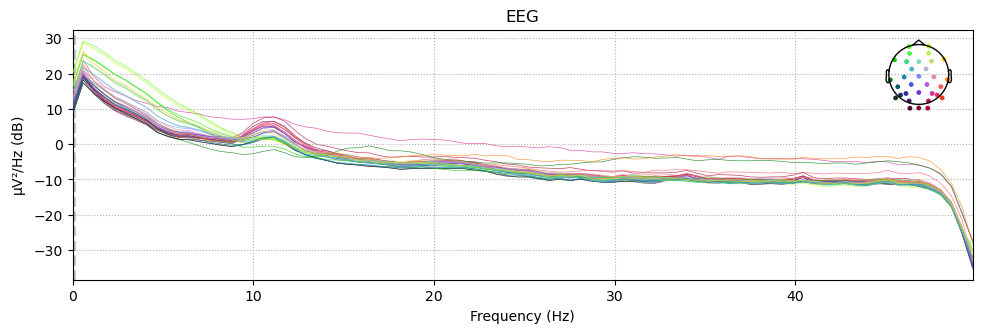

In [92]:
psd_obj = raw.compute_psd(fmax=50)
mne.viz.plot_raw_psd(raw, fmax=50, spatial_colors=True)

# Plot sensor locations
# fig = mne.viz.plot_sensors(raw.info, show_names=True)

### Check single channel

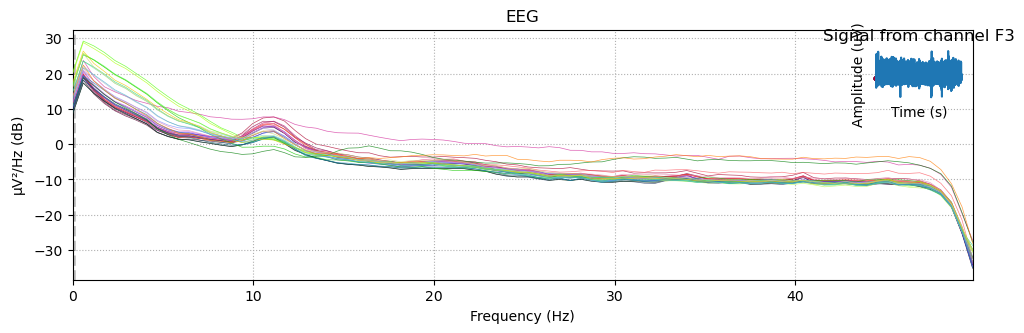

In [93]:
# Select a single channel
channel_name = 'F3'
channel_idx = raw.ch_names.index(channel_name)

# Extract the channel data and the times
data, times = raw[channel_idx, :]
data = data.squeeze() * 1e6 # convert to uV

# Plot the channel signal
import matplotlib.pyplot as plt
plt.plot(times, data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uV)')
plt.title(f'Signal from channel {channel_name}')
plt.show()

In [94]:
# set up and fit the ICA
# ica = mne.preprocessing.ICA(n_components=20, random_state=0, max_iter='auto', method='picard')
# ica.fit(raw)
# ica.exclude = [1, 2]  # details on how we picked these are omitted here
# ica.plot_properties(raw, picks=ica.exclude)


### Detect events

120 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
96 events found
Event IDs: [1]
24 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
120 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
40 events found
Event IDs: [1]
48 events found
Event IDs: [1]
32 events found
Event IDs: [1]
32 events found
Event IDs: [1]
24 events found
Event IDs: [1]
8 events found
Event IDs: [1]
24 events found
Event IDs: [1]
32 events found
Event IDs: [1]
119 events found
Event IDs: [1]


/var/folders/bj/ssk5bqjx2cv89z076k2dg5hm0000gn/T/ipykernel_11476/2261419576.py:15: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'],


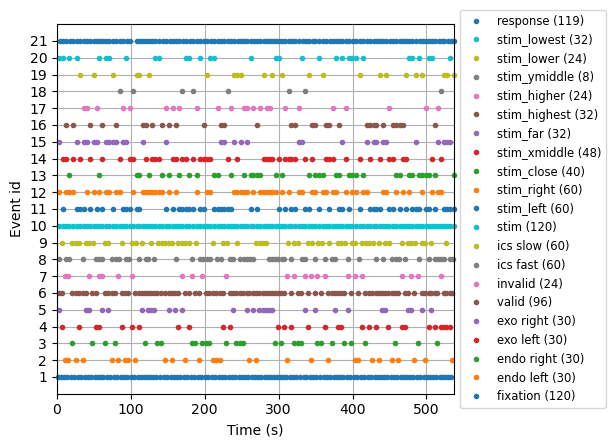

In [95]:
stim_channel_names = [ch_name for ch_name, ch_type in zip(ch_names, ch_types) if ch_type == 'stim']
events = np.array([], dtype=int).reshape(0, 3)  # Create an empty events array with 3 columns

for idx, stim_channel_name in enumerate(stim_channel_names):
    single_event = mne.find_events(raw, stim_channel=stim_channel_name, min_duration=1/raw.info['sfreq'])

    # Update the event id in single_event (the third column) to be idx + 1
    single_event[:, 2] = idx + 1

    # Concatenate single_event to the events array
    events = np.vstack([events, single_event])

event_dict = {stim_channel_name: idx + 1 for idx, stim_channel_name in enumerate(stim_channel_names)}

fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

Not setting metadata
48 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 481 original time points ...
0 bad epochs dropped
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated


/var/folders/bj/ssk5bqjx2cv89z076k2dg5hm0000gn/T/ipykernel_11476/2157811952.py:16: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, intersected_events, event_id={'merged_2_3_intersect_6': 8}, tmin=-0.1, tmax=0.3, preload=True)


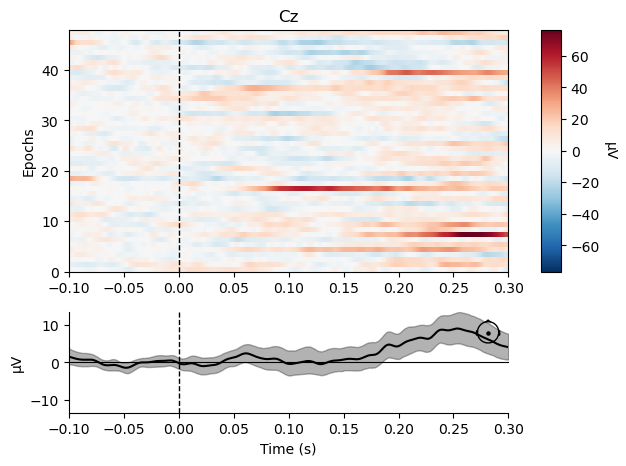

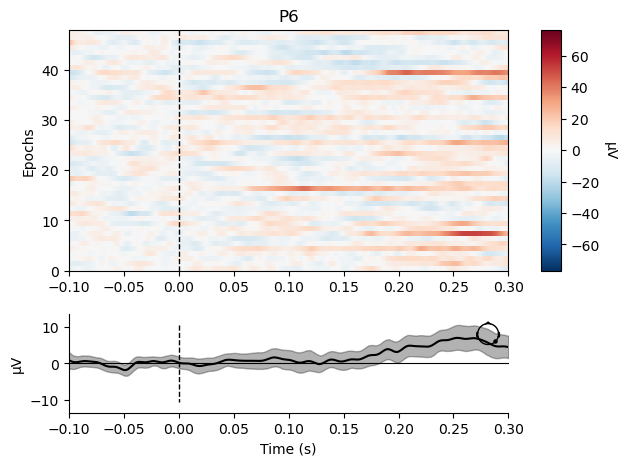

[<Figure size 640x480 with 4 Axes>, <Figure size 640x480 with 4 Axes>]

In [96]:
# Create separate events arrays for events to merge (2 and 3) and the event to intersect with (6)
events_to_merge = events[np.isin(events[:, 2], [4, 5])]
event_to_intersect = events[events[:, 2] == 6]

# Merge events 2 and 3 by changing their event ids to a new id (e.g., 8)
merged_events = events_to_merge.copy()
merged_events[:, 2] = 8

# Find the intersection between the merged events and event 6
intersection_samples = np.intersect1d(merged_events[:, 0], event_to_intersect[:, 0])

# Create a new events array with the intersected events
intersected_events = merged_events[np.isin(merged_events[:, 0], intersection_samples)]

# Create epochs with the intersected events
epochs = mne.Epochs(raw, intersected_events, event_id={'merged_2_3_intersect_6': 8}, tmin=-0.1, tmax=0.3, preload=True)

# Plot the epochs
epochs.plot_image(picks=['Cz', 'P6'])

### Time-frequency analysis

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


Applying baseline correction (mode: logratio)


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.7s finished


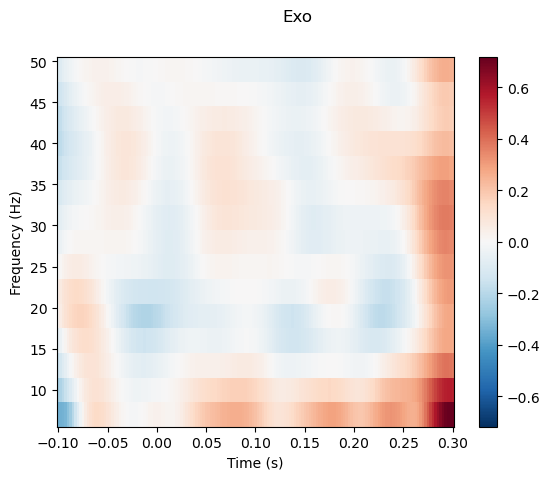

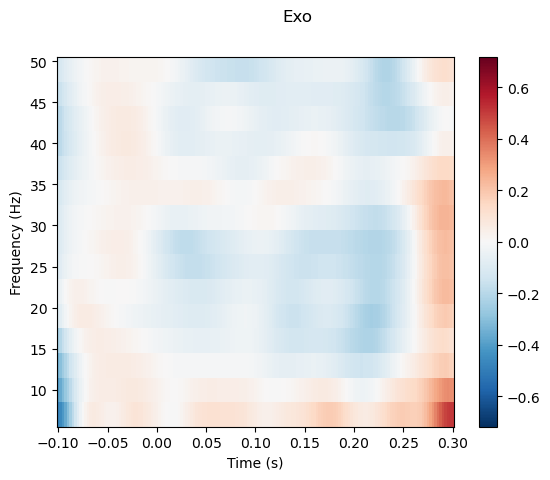

[<Figure size 640x480 with 2 Axes>, <Figure size 640x480 with 2 Axes>]

In [97]:
frequencies = np.arange(7, 50, 3)
# power = mne.time_frequency.tfr_morlet(epochs, n_cycles=2, return_itc=False,
#                                       freqs=frequencies, decim=3)
n_cycles = np.linspace(1, 10, len(frequencies))
power = mne.time_frequency.tfr_morlet(epochs, n_cycles=n_cycles, return_itc=False,
                                      freqs=frequencies, decim=3)


power.plot(['P6', 'Cz'], baseline=(-0.1, 0), mode='logratio', title='Exo')

In [ ]:
# Estimating evoked responses#
evoked = epochs.average()

mne.viz.plot_compare_evokeds(,
                             legend='upper left', show_sensors='upper right')